# Design rules of CSK modulation proposed in IEEE 802.15.7

### Defining the 2D-space 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate one vertex of the equilateral triangle
vertex1 = [0, 2/3**0.5]

# Rotate the vertex to find the other two vertices
angle120 = 120 * np.pi / 180  # 120 degrees in radians
angle240 = 240 * np.pi / 180  # 240 degrees in radians
rotation_matrix120 = np.array([[np.cos(angle120), -np.sin(angle120)],
                               [np.sin(angle120), np.cos(angle120)]])
rotation_matrix240 = np.array([[np.cos(angle240), -np.sin(angle240)],
                               [np.sin(angle240), np.cos(angle240)]])

vertex2 = np.dot(rotation_matrix120, vertex1)
vertex3 = np.dot(rotation_matrix240, vertex1)

# Plot the equilateral triangle
triangle = np.array([vertex1, vertex2, vertex3, vertex1])  # Closing the triangle
plt.plot(triangle[:,0], triangle[:,1], 'r')

# Add labels to the vertices
plt.text(vertex1[0], vertex1[1], 'Vertex 1 (0, 2/√3)', ha='right')
plt.text(vertex2[0], vertex2[1], 'Vertex 2 (-1/2, -√3/6)', ha='center')
plt.text(vertex3[0], vertex3[1], 'Vertex 3 (1/2, -√3/6)', ha='left')

# Set axis limits and aspect ratio
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.gca().set_aspect('equal', adjustable='box')

# Add labels and show the plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Equilateral Triangle with Centroid (0,0) and Side Length 1')
plt.grid(True)
plt.show()


### Computing the 16-CSK points:

In [ ]:
import matplotlib.pyplot as plt

# Define the vertices of the main equilateral triangle IJK
S5 = vertex1
S10 = vertex2
S15 = vertex3

# Calculate the centroid S0 of triangle IJK
S0 = [(S5[0] + S10[0] + S15[0]) / 3, (S5[1] + S10[1] + S15[1]) / 3]

# Calculate points that divide the sides into thirds
S2 = [(2 * S5[0] + S10[0]) / 3, (2 * S5[1] + S10[1]) / 3]
S8 = [(2 * S10[0] + S5[0]) / 3, (2 * S10[1] + S5[1]) / 3]
S11 = [(2 * S10[0] + S15[0]) / 3, (2 * S10[1] + S15[1]) / 3]
S14 = [(2 * S15[0] + S10[0]) / 3, (2 * S15[1] + S10[1]) / 3]
S12 = [(2 * S15[0] + S5[0]) / 3, (2 * S15[1] + S5[1]) / 3]
S3 = [(2 * S5[0] + S15[0]) / 3, (2 * S5[1] + S15[1]) / 3]

# Calculate centroids of smaller triangles
S9 = [(S8[0] + S10[0] + S11[0]) / 3, (S8[1] + S10[1] + S11[1]) / 3]
S7 = [(S11[0] + S14[0] + S0[0]) / 3, (S11[1] + S14[1] + S0[0]) / 3]
S13 = [(S14[0] + S15[0] + S12[0]) / 3, (S14[1] + S15[1] + S12[1]) / 3]
S6 = [(S3[0] + S0[0] + S12[0]) / 3, (S8[1] + S0[1] + S12[1]) / 3]
S4 = [(S8[0] + S0[0] + S2[0]) / 3, (S8[1] + S0[1] + S2[1]) / 3]
S1 = [(S2[0] + S3[0] + S5[0]) / 3, (S2[1] + S3[1] + S5[1]) / 3]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points
points = [S0, S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15]
labels = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']

for point, label in zip(points, labels):
    ax.plot(point[0], point[1], 'o', label=label)

# Set axis limits and aspect ratio
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal', adjustable='box')

# Add labels to the points
for point, label in zip(points, labels):
    ax.annotate(label, (point[0], point[1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the plot
# plt.legend(loc='upper right')
plt.grid()
plt.title('Geometric Configuration of Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Computing the 16-CSK points according to IEEE 802.15.5 in $\mathbb{R}^3$

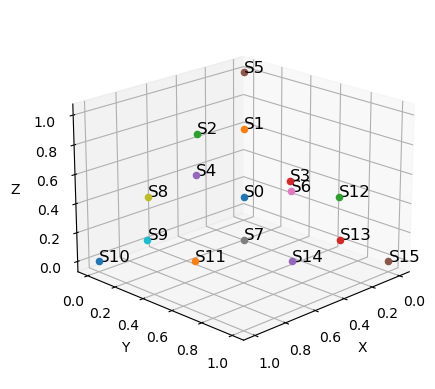

120
Eclidean Minimum Distance:
 0.15713484026367722


In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Number of points inside of the 3D-triangle
N = 16

def euclidean_distance(p1, p2):
    return np.linalg.norm(p2 - p1)

def euclidean_mindist(coordinates):
    distances = []
    for i in range(N):
        for j in range(i + 1, N):
            distances.append(
                euclidean_distance(
                    np.array(coordinates[i]), 
                    np.array(coordinates[j])
                    )
                )
    print(len(distances))
    return min(distances)

# Define the vertices of the main equilateral triangle IJK
S5 = [0, 0, 1]
S10 = [1, 0, 0]
S15 = [0, 1, 0]

# Calculate the centroid S0 of triangle IJK
S0 = [(S5[0] + S10[0] + S15[0]) / 3, (S5[1] + S10[1] + S15[1]) / 3, (S5[2] + S10[2] + S15[2]) / 3]

# Calculate points that divide the sides into thirds
S2 = [(2 * S5[0] + S10[0]) / 3, (2 * S5[1] + S10[1]) / 3, (2 * S5[2] + S10[2]) / 3]
S8 = [(2 * S10[0] + S5[0]) / 3, (2 * S10[1] + S5[1]) / 3, (2 * S10[2] + S5[2]) / 3]
S11 = [(2 * S10[0] + S15[0]) / 3, (2 * S10[1] + S15[1]) / 3, (2 * S10[2] + S15[2]) / 3]
S14 = [(2 * S15[0] + S10[0]) / 3, (2 * S15[1] + S10[1]) / 3, (2 * S15[2] + S10[2]) / 3]
S12 = [(2 * S15[0] + S5[0]) / 3, (2 * S15[1] + S5[1]) / 3, (2 * S15[2] + S5[2]) / 3]
S3 = [(2 * S5[0] + S15[0]) / 3, (2 * S5[1] + S15[1]) / 3, (2 * S5[2] + S15[2]) / 3]

# Calculate centroids of smaller triangles
S9 = [(S8[0] + S10[0] + S11[0]) / 3, (S8[1] + S10[1] + S11[1]) / 3, (S8[2] + S10[2] + S11[2]) / 3]
S7 = [(S11[0] + S14[0] + S0[0]) / 3, (S11[1] + S14[1] + S0[0]) / 3, (S11[2] + S14[2] + S0[2]) / 3]
S13 = [(S14[0] + S15[0] + S12[0]) / 3, (S14[1] + S15[1] + S12[1]) / 3, (S14[2] + S15[2] + S12[2]) / 3]
S4 = [(S8[0] + S0[0] + S2[0]) / 3, (S8[1] + S0[1] + S2[1]) / 3, (S8[2] + S0[2] + S2[2]) / 3]
S6 = [(S0[0] + S12[0] + S3[0]) / 3, (S0[1] + S12[1] + S3[1]) / 3, (S0[2] + S12[2] + S3[2]) / 3]
S1 = [(S2[0] + S3[0] + S5[0]) / 3, (S2[1] + S3[1] + S5[1]) / 3, (S2[2] + S3[2] + S5[2]) / 3]

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the points with labels
points = [S0, S1, S2, S3, S4, S5, S6, S7, S8, S9, S10, S11, S12, S13, S14, S15]
labels = ['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15']

ax.view_init(elev=20., azim=45)


for i, point in enumerate(points):
    ax.scatter(point[0], point[1], point[2], label=labels[i])

# Add labels to the points
for i, label in enumerate(labels):
    ax.text(points[i][0], points[i][1], points[i][2], label, fontsize=12)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
# plt.legend()
plt.show()

# Computes the euclidean minimum distance of the points
print("Eclidean Minimum Distance:\n", euclidean_mindist(points))


### Apply the inverse orthographic projection to the 2D points $\mathbb{R}^2 \rightarrow \mathbb{R}^3$

